In [33]:
# Import libraries necessary for this project

from IPython.display import display, HTML, IFrame, Image
import plotly.offline as py
import plotly.graph_objs as go
import ast
import pycountry

In [34]:
# Create an empty list to store temperature data
temperature_data = []

# Define the function the yield the lines separated by the delimeter
def myreadlines(f, delimeter):
  buf = ""
  while True:
    while delimeter in buf:
      pos = buf.index(delimeter)
      yield buf[:pos]
      buf = buf[pos + len(delimeter):]
    chunk = f.read(4096) # limit the amount of word to read each time
    if not chunk:
      yield buf
      break
    buf += chunk

# Read the data.txt file which inclue the temperate data for each country and save the data to temperature_data list
with open('data.txt') as f:
  for line in myreadlines(f, ";"):
    temperature_data.append(line)

# Remove the empty list data
temperature_data.remove('')

In [35]:
country_code = []
country_name = []
temperatures = []

In [36]:
for x in temperature_data:
    x = ast.literal_eval(x)
    country_code.append(x['country_code'])
    country_name.append(pycountry.countries.get(alpha_3=x['country_code']).name)
    temperatures.append(int(x['temperature']['temp'])-273.15)

In [37]:
max_temp = max(temperatures)
min_temp = min(temperatures)
mean_temp = (max_temp+min_temp)/2
mean_temp = sum(temperatures)/len(temperatures)
data = [ dict(
        type = 'choropleth',
        locations = country_code,
        z = temperatures,
        text = country_name,
        colorscale= [
        [0, '#0000ff'],
        [0.4, '#00ddff'],
        [0.8, '#ffff00'],
        [1, '#ff0000']
      ],
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Temperature (Celcius)'),
      ) ]

layout = dict(
    title = 'Average Temperature In Each Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.plot( fig, validate=False, filename='world-map-temperature.html', image='png', image_filename='world_temperature_graph', show_link=False, auto_open=False, config={"displayModeBar": False} );

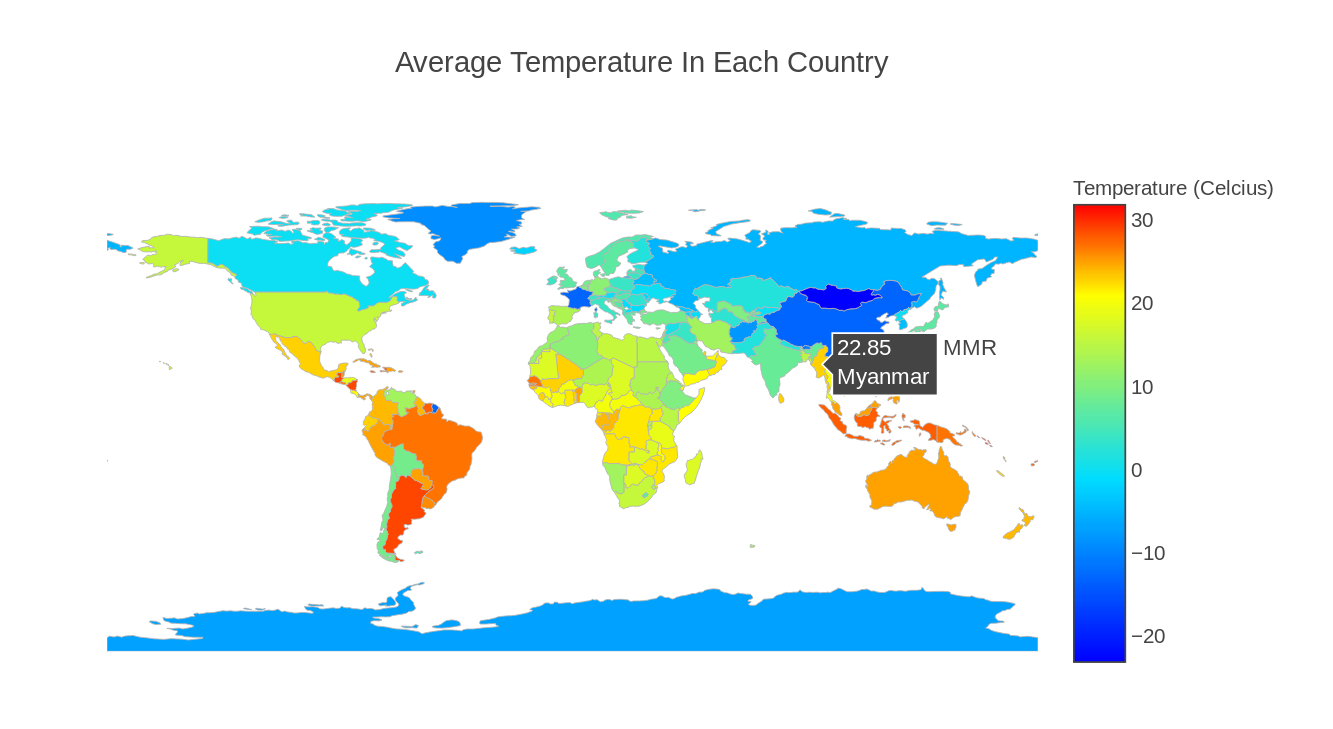

In [40]:
# display the html file in Iframe
display(IFrame('world-map-temperature.html', width=800, height=500))

# display the image file
Image('world-map-temperature.png')